In [1]:
import sys
import os
import subprocess
import tarfile
import shutil
import random
from functools import partial
from tqdm import tqdm
from tqdm.auto import tqdm
tqdm.pandas()

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Bio import motifs
import pickle
from datetime import datetime
import scipy.stats as stats

import boda
from boda.common import constants, utils

boda_src = os.path.join( os.path.dirname( os.path.dirname( os.getcwd() ) ), 'src' )
sys.path.insert(0, boda_src)

from main import unpack_artifact, model_fn

from boda.generator.plot_tools import matrix_to_dms, ppm_to_IC, ppm_to_pwm, counts_to_ppm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
if os.path.isdir('./artifacts'):
    shutil.rmtree('./artifacts')
hpo_rec = 'gs://syrgoth/aip_ui_test/model_artifacts__20211113_021200__287348.tar.gz'
unpack_artifact(hpo_rec)

model_dir = './artifacts'
model = model_fn(model_dir)
#model.cuda()
model.eval()
print('')

Loaded model from 20211113_021200 in eval mode



archive unpacked in ./


In [6]:
test_df = pd.read_csv('boda_test_no_cutoffs_pred_contributions.txt', sep=" ", low_memory=False)

In [18]:
test_df['K562_contrib_sum'] = test_df.apply(lambda x: sum([float(n) for n in x['K562_contrib'].split(',')]), axis=1)

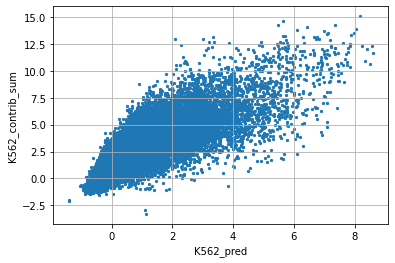

In [40]:
test_df.plot.scatter(x='K562_pred', y='K562_contrib_sum', marker='.', grid=True)
plt.show()

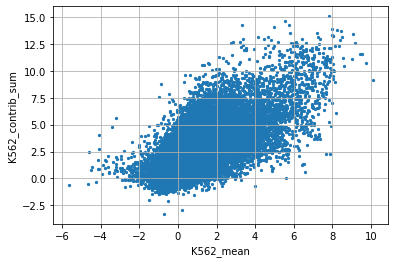

In [27]:
test_df.plot.scatter(x='K562_mean', y='K562_contrib_sum', marker='.', grid=True)
plt.show()

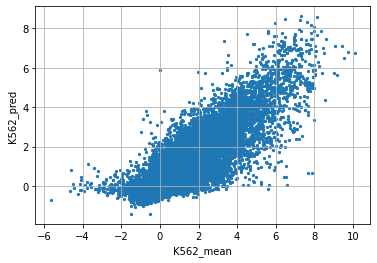

In [43]:
test_df.plot.scatter(x='K562_mean', y='K562_pred', marker='.', grid=True)
plt.show()

In [44]:
pearson = test_df[['K562_mean', 'K562_pred']].corr(method='pearson').iloc[0][1]
print(pearson)

pearson = test_df[['K562_pred_aggreg', 'K562_contrib_sum']].corr(method='pearson').iloc[0][1]
print(pearson)

pearson = test_df[['K562_mean', 'K562_contrib_sum']].corr(method='pearson').iloc[0][1]
print(pearson)

0.8564031716512764
0.8035555741176996
0.7100285125017525
